# Homework 1.  Individual Homework

Due date:  September 12, 11:59pm EST
Check your homework into the HW1 drop box.


Problem A.  [30 pts]  We are going to use 1 million digits of pi available at http://www.exploratorium.edu/pi/pi_archive/Pi10-6.html


Problem A1.
Compute and print out the marginal probabilities P(Xi) for each of the digits across all million numbers.  What kind of What kind of distribution does this suggest?


 The probability of 0 is 0.1000
 The probability of 1 is 0.0998
 The probability of 2 is 0.1000
 The probability of 3 is 0.1002
 The probability of 4 is 0.1002
 The probability of 5 is 0.1004
 The probability of 6 is 0.0995
 The probability of 7 is 0.0998
 The probability of 8 is 0.1000
 The probability of 9 is 0.1001


(array([  99959.,   99758.,  100026.,  100229.,  100230.,  100359.,
          99548.,   99800.,   99985.,  100106.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

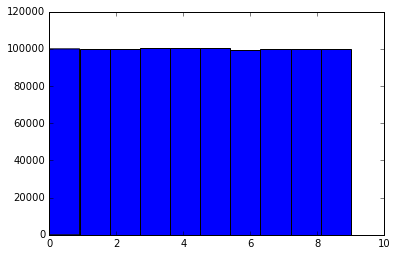

In [11]:
import urllib2
import numpy as np
from bs4 import BeautifulSoup
import matplotlib
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

page = urllib2.urlopen("http://www.exploratorium.edu/pi/pi_archive/Pi10-6.html").read()
soup = BeautifulSoup(page, "lxml")
pi_string = soup.find_all('pre')[-1]
pi_string = str(pi_string.string)
pi_string = pi_string.split(".")[1]
pi_string = pi_string.replace('\n', '')
pi_string = pi_string.replace(' ', '')
probability = range(0,10)
counter_x = range(0, 10)
pi_string_len = float(len(pi_string))
for ii in range(0, 10):
    probability[ii] = (float(pi_string.count(str(ii))))/pi_string_len
    counter_x[ii] = pi_string.count(str(ii))
    print " The probability of %d is %.4f" % (ii, probability[ii])

X_ = np.array([int(i) for i in pi_string])

plt.figure()
plt.hist(X_)

    Answer: The distribution above is similar to a uniform distribution with all the probability values pretty close to each other. Histogram is plotted for confirmation. 

Problem A2:
Compute the joint probability of P(xi = 1, xi-1 = 3).   Based on this value, what can you say about the independence relationship.    

In [12]:
from __future__ import division
import numpy as np

counter = 0
for ii in range(1, len(pi_string)):
    if pi_string[ii] == '1' and pi_string[ii-1] == '3':
        counter = counter + 1
p = (counter/len(pi_string))
jo = probability[1] * probability[3];
print "P(Xi = 1, Xi - 1 = 3) is %f" % p
print "P(Xi = 1) * P(Xi -1 = 3) is %f" %jo

P(Xi = 1, Xi - 1 = 3) is 0.009938
P(Xi = 1) * P(Xi -1 = 3) is 0.009999


    Answer: Based on the probability values calculated, the events are not completely independent as P(Xi = 1 | Xi - 1 = 3) is not equal to P(Xi = 1) * P(Xi -1 = 3). But the values are almost equal. 

Problem A3:
Compute the conditional probability P(xi = 3 | xi-1 = 1).   Assert how this relates to problem 
directly.  Compute the same conditional probability using the definition of conditional probability.  


In [13]:
from __future__ import division
import numpy as np

counter_c = 0
count_1 = float(pi_string.count('1'))
for ii in range(1, len(pi_string)):
    if pi_string[ii] == '3' and pi_string[ii-1] == '1':
        counter_c = counter_c + 1
print "P(Xi = 3 | Xi -1 = 1) is %.4f" % (counter_c/count_1)

P(Xi = 3 | Xi -1 = 1) is 0.1004


Problem A4:
Let A be the pi values at indices 1-1000
Let B be the pi values at indices 2-1001
Let C be the pi values at indices 3- 1002
Compute the sample covariance matrix for A, B, C against each other. without using the built-in command (i.e. code it yourself). 
The result should be a 3x3 matrix.


In [14]:
import numpy as np
from __future__ import division

#Only using the decimal places, not using 3. 
A = pi_string[0:1000]
A_ = range(0,1000)
B_ = A_
C_ = B_
B = pi_string[1:1001]
C = pi_string[2:1002]

A_ = np.array([int(i) for i in A])
B_ = np.array([int(i) for i in B])
C_ = np.array([int(i) for i in C])

D_ = np.array([A_, B_, C_])

n_1 = len(A_)
n_1 = 1/(n_1)

E_X = np.array([np.average(A_), np.average(B_), np.average(C_)])

E_X = np.transpose(E_X)

A_ = A_ - E_X[0]
B_ = B_ - E_X[1]
C_ = C_ - E_X[2]

matrix_E_X = np.matrix([A_, B_, C_])
matrix_E_X_1 = np.transpose(matrix_E_X)
covv = (n_1)*(matrix_E_X * matrix_E_X_1)

print covv

[[  8.41342400e+00  -3.03528000e-01  -6.43200000e-03]
 [ -3.03528000e-01   8.40351600e+00  -3.10396000e-01]
 [ -6.43200000e-03  -3.10396000e-01   8.41567600e+00]]


Compute the correlation matrix for A, B, C against each other without using the built-in command (i.e. code it yourself).  The result should be a 3 x 3 matrix.

In [15]:
from __future__ import division
import numpy as np

sA = np.std(A_)
sB = np.std(B_)
sC = np.std(C_)

ssAB = sA*sB
ssBC = sB*sC
ssAC = sA*sC

s2A = sA*sA
s2B = sB*sB
s2C = sC*sC

correlation = np.zeros((3,3))

correlation[0,0] = (covv[0,0])/s2A
correlation[1,1] = (covv[1,1])/s2B
correlation[2,2] = (covv[2,2])/s2C
correlation[1,0] = (covv[1,0])/ssAB
correlation[0,1] = (covv[0,1])/ssAB
correlation[2,0] = (covv[2,0])/ssBC
correlation[0,2] = (covv[0,2])/ssBC
correlation[1,2] = (covv[1,2])/ssAC
correlation[2,1] = (covv[2,1])/ssAC

print correlation

[[  1.00000000e+00  -3.60978933e-02  -7.64840746e-04]
 [ -3.60978933e-02   1.00000000e+00  -3.68880098e-02]
 [ -7.64840746e-04  -3.68880098e-02   1.00000000e+00]]


Problem B.  [35 pts]  Run a simulation of the Monte Hall problem with 4 doors and 1 prize.   (https://en.wikipedia.org/wiki/Monty_Hall_problem).   
For simplicity, you can assume that the game player always initially chooses door A and the host will open one door.  The prize may be behind any of the 4 doors.  


In [16]:
import random
import numpy as np
from __future__ import division

win_switch = 0
loss_switch = 0

win_no_switch = 0
loss_no_switch = 0

switch = ['True', 'False']

no_trials = 100000

for j in range(0,2):
    if switch[j] == 'True':
        for ii in xrange(no_trials):
            player_door = 0
            prize_door = random.randint(0, 3)
            doors = range(0, 4)
            doors_he_will_open = range(0, 4)
            if prize_door == player_door:
                doors_he_will_open.remove(player_door)
                another_door = random.choice(doors_he_will_open)
                doors_he_will_open.remove(another_door)
            else:
                doors_he_will_open.remove(player_door)
                doors_he_will_open.remove(prize_door)

            door_he_does_open = random.choice(doors_he_will_open)

            doors.remove(door_he_does_open)
            doors.remove(player_door)
            doors_he_will_open.remove(door_he_does_open)

            player_door = random.choice(doors)
            if player_door == prize_door:
                win_switch = win_switch + 1
            else:
                loss_switch = loss_switch + 1   

    else:
        for ii in xrange(no_trials):
            player_door = 0
            prize_door = random.randint(0, 3)
            doors = range(0, 4)
            doors_he_will_open = range(0, 4)
            switch = ['True', 'False']
            if prize_door == player_door:
                doors_he_will_open.remove(player_door)
                another_door = random.choice(doors_he_will_open)
                doors_he_will_open.remove(another_door)
            else:
                doors_he_will_open.remove(player_door)
                doors_he_will_open.remove(prize_door)

            door_he_does_open = random.choice(doors_he_will_open)

            doors.remove(door_he_does_open)
            doors.remove(player_door)
            doors_he_will_open.remove(door_he_does_open)
            if player_door == prize_door:
                win_no_switch = win_no_switch + 1
            else:
                loss_no_switch = loss_no_switch + 1   

print "Probability of Winning by switching = %.3f" % (win_switch/no_trials)
print "Probability of Losing by switching = %.3f" % (loss_switch/no_trials)
print "Probability of Winning by not switching = %.3f" % (win_no_switch/no_trials)
print "Probability of Losing by not switching = %.3f" % (loss_no_switch/no_trials)

Probability of Winning by switching = 0.373
Probability of Losing by switching = 0.627
Probability of Winning by not switching = 0.250
Probability of Losing by not switching = 0.750


Based on the simulation, what is the probability of winning if you switch doors?


    Answer: Based on the simulation above, the probability of winning by switching doors is 37.5%

Based on the simulation, what is the probability of winning if you keep door A?

    Answer: Based on the simulation above, the probability of winning by keeping the original door is 25%. 

Problem C. [20 points]
The distribution for BMI is shown in Figure 1.  https://www.researchgate.net/figure/6075307_fig1_Fig-1-Distribution-of-body-mass-index-BMI-This-histogram-shows-the-frequency-of-BMI.   
<img src="histogram.png">

Problem C1  
From the plot, is the BMI distribution skewed negative, positive, or neither?


    Answer: From visual inspection, the BMI distribution above is positively skewed because most of the data is on the left side with a few large values on the right side. 

Problem C2
A healthy weight is defined as having a BMI between 18.6 kg/m2 and 24.5 kg/m2.  What is the probability of having a healthy weight?

In [17]:
import random
import numpy as np
from __future__ import division

bin_size = 2
freq = [2, 3, 9, 32, 38, 48, 47, 28, 22, 25, 12, 3, 3, 1, 2, 2, 3, 0, 1]
bin_val = [14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52]
total_area = bin_size*sum(freq)
prob_area = freq[2]*(20 - 18.6) + freq[3]*bin_size + freq[4]*bin_size + freq[5]*(26 - 24.5)
probability = prob_area/total_area

print "Probability of having a healthy BMI is %.3f" % probability

Probability of having a healthy BMI is 0.400


Problem C3.
The caption of the plot states that the mean BMI is 27 kg/m2 +/- 6 kg/m2.  Let’s assume that the data has a normal distribution with mean of 27 kg/m2 and a standard deviation of 6 kg/m2.  Compute the probability of someone being less than a healthy weight.  


In [18]:
import random
import numpy as np
import scipy.stats as st
from __future__ import division

mu = 27
sigma = 6
bmi = np.random.normal(mu, sigma, 1000)

po = st.norm.cdf((18.6-27)/6)

print "Probability of someone being less than a healthy BMI is %.3f" % po

Probability of someone being less than a healthy BMI is 0.081


Problem D. [15 pts]  Linear algebra. 

Problem D1:  Compute [1 2 3]’ * [4 5 6].  The ' indicates a transpose.

In [19]:
import random
import numpy as np

print np.transpose(np.matrix( ( (1), (2), (3) ) )) * np.matrix( ( (4), (5), (6) ) )

[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]


Problem D2:  Compute [1 2; 3 4; 6 0]  *  [2 5 3 ; 2 5 1]  * [1 2 1]’ where semicolons notation separates rows within a matrix.

In [20]:
import random
import numpy as np

print np.matrix( ((1, 2), (3, 4), (6, 0)) ) * np.matrix( ((2, 5, 3), (2, 5, 1)) ) * np.transpose(np.matrix( (1, 2, 1) ))

[[41]
 [97]
 [90]]
